# EMPLOYEE RETENTION DATA ANALYSIS

## **Pace: Plan**

### Business Problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, and ask to provide data-driven suggestions based on understanding of the data. They have the following question: 
- what’s likely to make the employee leave the company?

> The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If employees are predicted to be likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

###  dataset dictionary

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

### Load dataset

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_employee_retention.csv")

In [3]:
# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

- Understanding variables
- Clean the dataset (missing data, redundant data, outliers)

### Basic information about the data

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

Standardizing the column names so that they are all in `snake_case`.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0.rename({'Work_accident':'work_accident', 'Department':'department', 'average_montly_hours':'average_monthly_hours'},axis=1,inplace=True)

In [8]:
# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [9]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [10]:
# Check for duplicates
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates().reset_index(drop=True)

In [13]:
# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

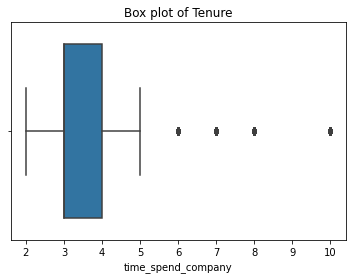

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df,
           x='time_spend_company')
plt.title('Box plot of Tenure')
plt.show()

In [15]:
# Determine the number of rows containing outliers

q1 = df.time_spend_company.quantile(0.25)
q2 = df.time_spend_company.quantile(0.5)
q3 = df.time_spend_company.quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)

print(f'Lower Limit = {q1}')
print(f'Upper Limit = {q3}')

number_of_outliers = df[df.time_spend_company>upper_limit].shape[0]

print(f'Number of rows containing outliers = {number_of_outliers}')

Lower Limit = 3.0
Upper Limit = 4.0
Number of rows containing outliers = 824


Certain types of models are more sensitive to outliers than others. We should consider whether to remove outliers, based on the type of model decided to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
left_count = df[df.left==1].shape[0]
stay_count = df[df.left==0].shape[0]

# Get percentages of people who left vs. stayed
left_percentage = (df[df.left==1].shape[0] / df.shape[0])*100
stay_percentage = (df[df.left==0].shape[0] / df.shape[0])*100

print(f'Percentage of people who left : {left_percentage:.2f}%')
print(f'Percentage of people who stayed : {stay_percentage:.2f}%')

Percentage of people who left : 16.60%
Percentage of people who stayed : 83.40%


### Data visualizations

In [17]:
df.head(4)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


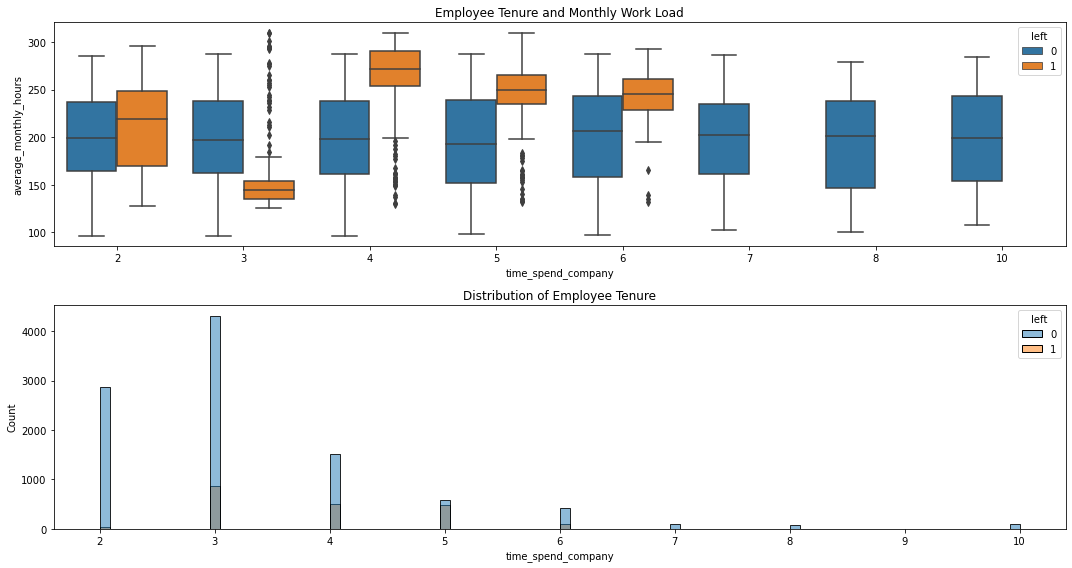

In [18]:
fig, axes = plt.subplots(2,1,figsize=(15,8))
sns.boxplot(data=df,
           x='time_spend_company',
           y='average_monthly_hours',
           hue='left',
           ax=axes[0])

axes[0].set_title('Employee Tenure and Monthly Work Load')
sns.histplot(data=df,
           x='time_spend_company',
           hue='left',
           ax=axes[1])

axes[1].set_title('Distribution of Employee Tenure')
plt.tight_layout()
plt.show()

#### OBSERVATIONS:

- Employees working for more than 6 years at the company have 0% chance of leaving, they secured their positions and are the loyal ones.
- Employees working at company for 6 years or less, have higher ratio of leaving; except for an exceptional case of 3 years.
- Tenure of 3 years gives a bit odd results, it could be because of the reason that 3 years is the contract period for entry level positions.

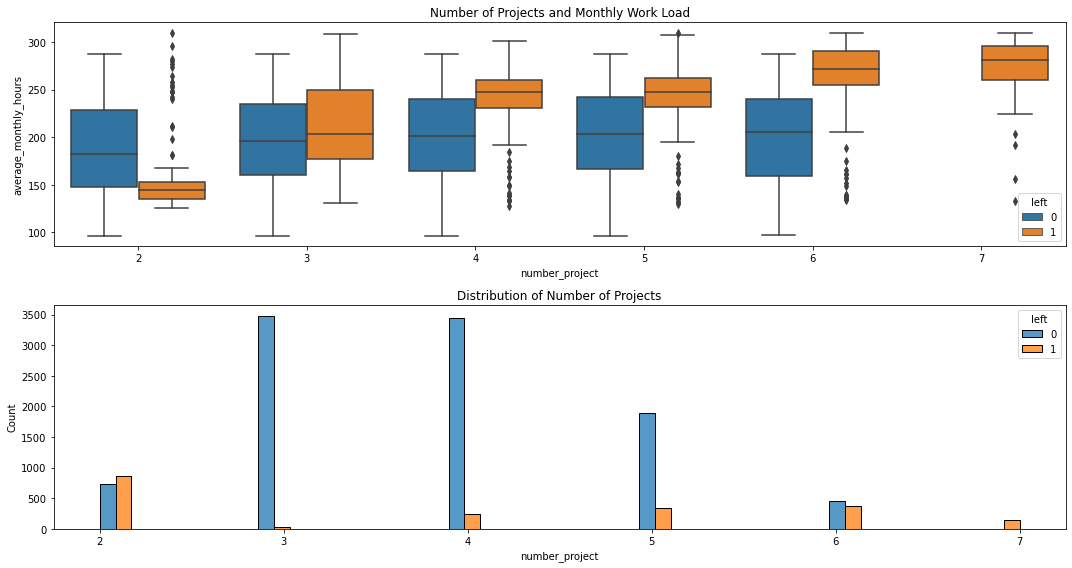

In [19]:
fig, axes = plt.subplots(2,1,figsize=(15,8))
sns.boxplot(data=df,
           x='number_project',
           y='average_monthly_hours',
           hue='left',
           ax=axes[0])

axes[0].set_title('Number of Projects and Monthly Work Load')
sns.histplot(data=df,
           x='number_project',
           hue='left',multiple='dodge',
           ax=axes[1])

axes[1].set_title('Distribution of Number of Projects')
plt.tight_layout()
plt.show()

#### OBSERVATIONS:
- Aside 2 & 7 number of projects, we can categorize employees into 2 groups:
    - Employees who worked less than their colleagues with same number of projects: For them, we can infer that they were either fired or working on quitting notice.
    - Employees who worked more than their peers with same number of projects: We can conclude that they might quit.
- All of the employees who worked on 7 projects left the company.
- On average, employees are likely to work on 3-4 projects and for these two categories proportion of left & stayed employees is not much different.

In [20]:
df[(df.number_project == 3) | (df.number_project==4)].average_monthly_hours.mean() # company's avg monthly workload

200.6799444829979

In [21]:
201/(5*4) # per-day workload

10.05

In [22]:
8*5*4

160

- In the company, average workload per month for optimal number of project is ~201 hours.
- It gives ~10 hours per day (including only work days Mon-Fri).
- Optimal working hours are considered to be 8 at any organization.

Hence, we can say that employees' here over-worked.

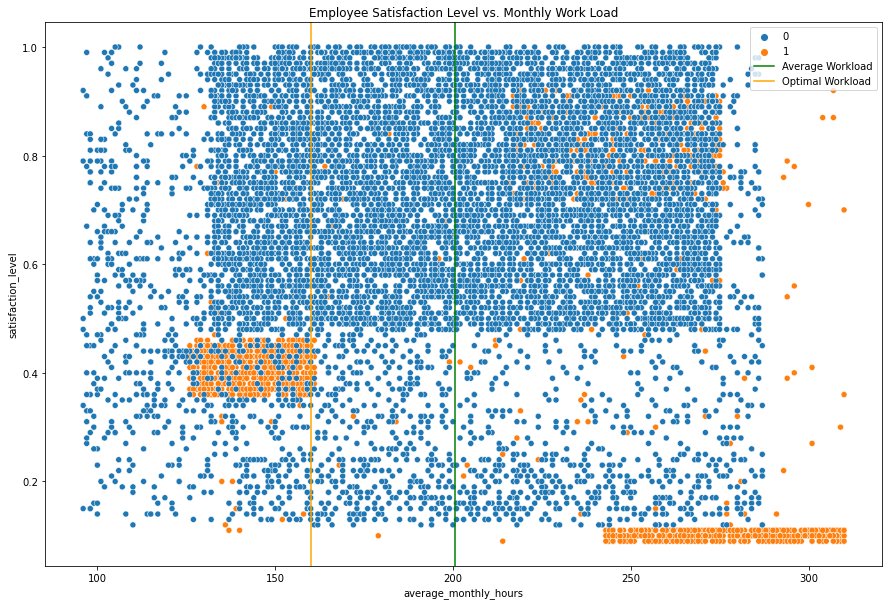

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,
           x='average_monthly_hours',
           y='satisfaction_level',
           hue='left')

plt.axvline(x=200.7, label='Average Workload', color='green')
plt.axvline(x=160, label='Optimal Workload', color='orange')

plt.legend()
plt.title('Employee Satisfaction Level vs. Monthly Work Load')
plt.show()

- There are three groups of employees who left with regard to their satisfaction level.
    1. Having workload of 240-320 hours a month, which is very high and it seems like they quit because of their greater workload, and low satisfaction is also due to this.
    2. Employees with work-load of 130-160 hours, there is no clear reason of their quitting. They have moderate level of satisfaction and they quit because they might get better opportunities outside or were fired.
    3. Employees with higher satisfaction level and greater work load (220-278 hours per month).

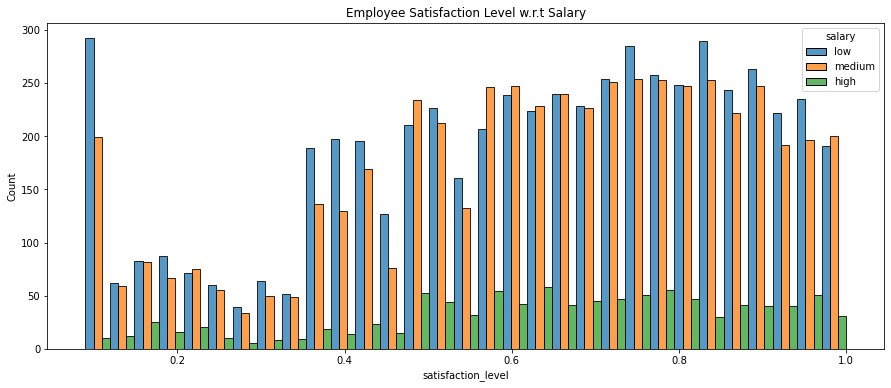

In [24]:
plt.figure(figsize=(15,6))
sns.histplot(data=df,
           x='satisfaction_level',
           hue='salary',
           multiple='dodge')

plt.title('Employee Satisfaction Level w.r.t Salary')
plt.show()

- There is no direct relation of salary with satisfaction level.
- Employees with different level of salaries have different satisfaction levels.

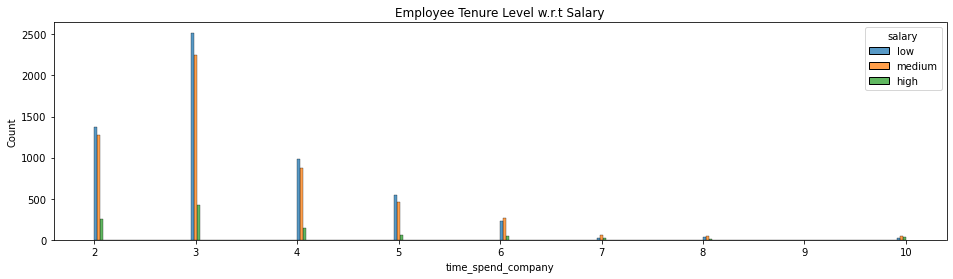

In [25]:
plt.figure(figsize=(16,4))
sns.histplot(data=df,
           x='time_spend_company',
           hue='salary',
           multiple='dodge')

plt.title('Employee Tenure Level w.r.t Salary')
plt.show()

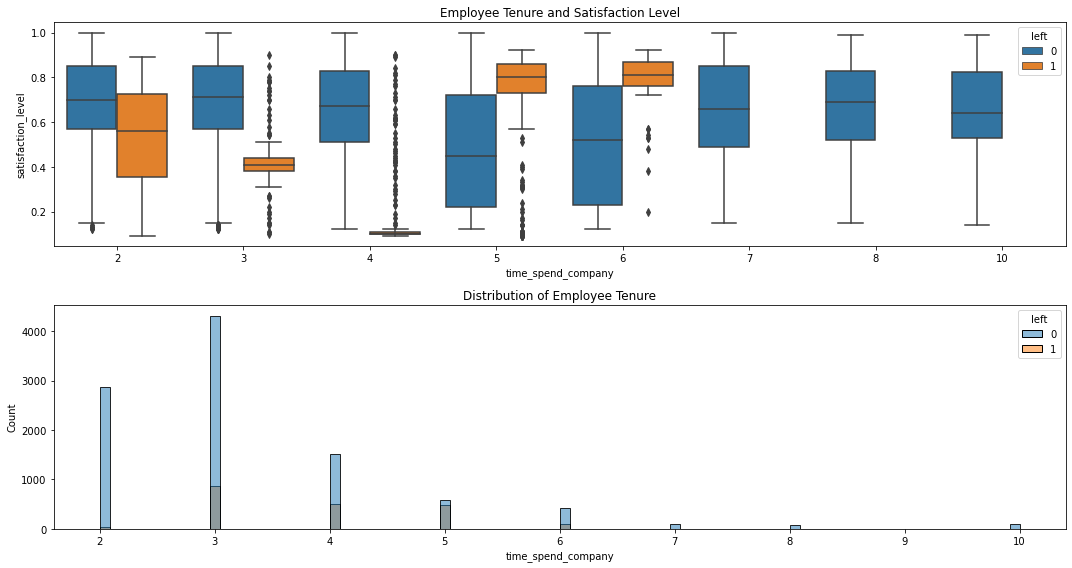

In [26]:
fig, axes = plt.subplots(2,1,figsize=(15,8))
sns.boxplot(data=df,
           x='time_spend_company',
           y='satisfaction_level',
           hue='left',
           ax=axes[0])

axes[0].set_title('Employee Tenure and Satisfaction Level')

sns.histplot(data=df,
           x='time_spend_company',
           hue='left',
           ax=axes[1])

axes[1].set_title('Distribution of Employee Tenure')
plt.tight_layout()
plt.show()

- Employee with longer tenure seems to be quite satisfied, it might be bacause they have secured their positions and are at higher ranks.
- Short tenured employees have high satisfaction.
- Medium tenured employees are less satisfied.

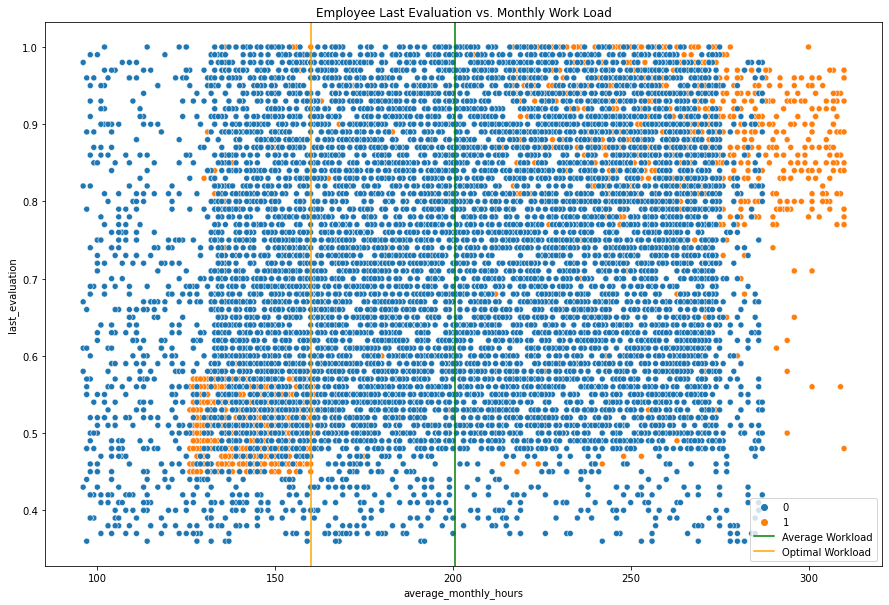

In [27]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,
           x='average_monthly_hours',
           y='last_evaluation',
           hue='left')

plt.axvline(x=200.7, label='Average Workload', color='green')
plt.axvline(x=160, label='Optimal Workload', color='orange')

plt.legend()
plt.title('Employee Last Evaluation vs. Monthly Work Load')
plt.show()

There are 2 groups of employees who quit.
1. Employee who worked less and having low evaluation score.
2. Employees who worked much more and have good evaluation score.

Longer working hours do not gurantee good evaluation score.

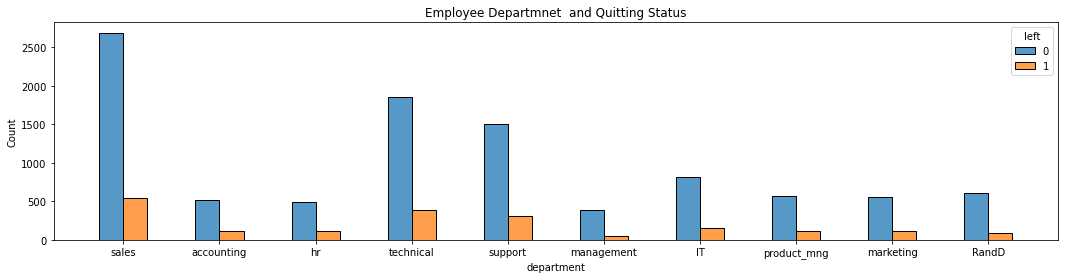

In [28]:
plt.figure(figsize=(18,4))
sns.histplot(data=df,
           x='department',
           hue='left',
           multiple='dodge', shrink=0.5)

plt.title('Employee Departmnet  and Quitting Status')
plt.show()

In [29]:
df.groupby(['promotion_last_5years','left'])['average_monthly_hours'].mean().reset_index()

,promotion_last_5years,left,average_monthly_hours
0,0,0,198.932585
1,0,1,208.281392
2,1,0,199.451282
3,1,1,178.625000


- It seems like promotion is not based on working more.
- Employees who worked much more did not get promotion and their proportion of leaving the company is higher than those who worked comparetively less and got promotion. 

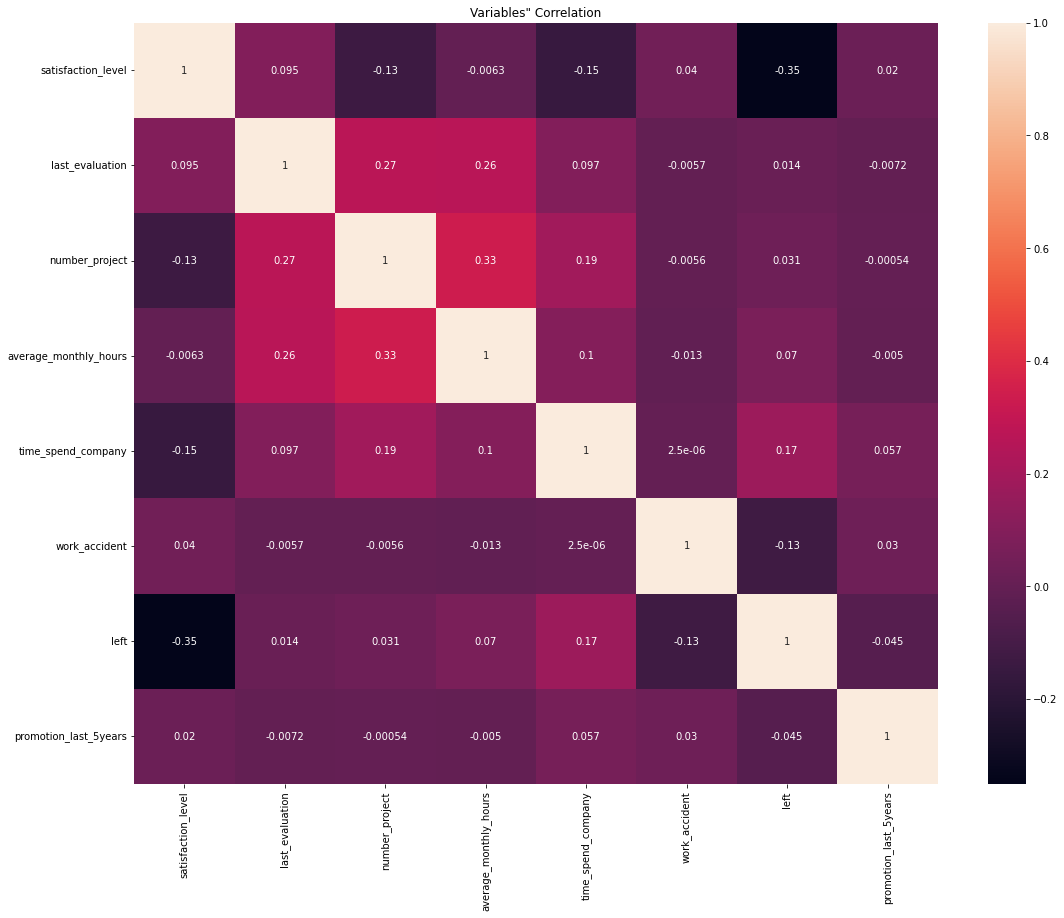

In [33]:
plt.figure(figsize=(18,14))
sns.heatmap(data=df.drop(columns=['department','salary'], axis=1).corr(),
            annot=True)

plt.title('Variables" Correlation')
plt.show()

- Employee's last evaluation, the number of projects he/she worked on and the average monthly hours are highly correlated to each other.
- Employees's satisfaction level is negatively correlated to left(quitting status).

### Insights

- Employees left company because of greater workload and no less chances of promotion.
- Employees who left are generally those with long working hours, more number of projects they have been assigned and low satisfaction level.
- Working for long hours do not guarantee good evaluation score.
- It seems like there is mis-management of the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well model fits the data

🔎
##  Model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

## Model Building & Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether the employee will leave the company or will stay. Outcome is binary and predictors are combination of continous and discrete variables. Hence the task is binary classification.

### Identify the types of models most appropriate for this task.

- Logistic Regression
- Decision Tree Classifier.
- XGBoost Classifier.

### Modeling

In [34]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
data = df.copy()

## PRE-PROCESSING

#### ENCODING CATEGRICAL DATA:
- `salary` : Being ordianl in nature, it will be converted to category data-type.
- `department` : Being nominal will be converted using one-hot encoding using pd.get_dummies.

In [36]:
data.salary = data.salary.astype('category').cat.set_categories(['low','medium','high']).cat.codes

In [37]:
data = pd.get_dummies(data)

In [38]:
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False


#### REMOVING OUTLIERS:
- The tenure column has about 7% outliers (as inspected earlier), they needs to be remved for modeling.

In [39]:
# removing outliers in tenure
data = data[(data.time_spend_company>=lower_limit) & (data.time_spend_company<=upper_limit)]

In [40]:
(data.shape[0]/df.shape[0])*100

93.12817946793427

**NOT A BIG LOSS!**

#### TRAIN TEST SPLIT:
In order to build model, first we will split the data into training and testing set, so that we can evaluate model based on test set. The train test ratio will be 70:30.

In [41]:
y = data[['left']]
X = data.drop('left',axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=101)

#### STANDARDIZING DATA:

Data needs to be standardize to bring it to common scale.

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## LOGISTIC REGRESSION

In [44]:
log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train, y_train)

/home/huda/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [45]:
y_preds_lrc = log_reg_clf.predict(X_test)

In [46]:
print(classification_report(y_test, y_preds_lrc))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2786
           1       0.50      0.28      0.36       565

    accuracy                           0.83      3351
   macro avg       0.68      0.61      0.63      3351
weighted avg       0.80      0.83      0.81      3351



The model gives an accuracy of 83%, precision of 80%, recall of 83% and has an f1-score of 81%.

In [47]:
cf_matrix = confusion_matrix(y_test, y_preds_lrc)

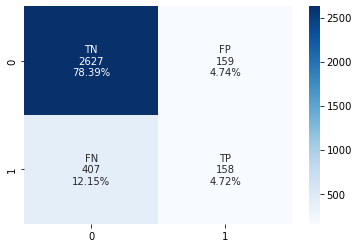

In [48]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.show()

Model performs not bad but also not too good. The predcitions can be improved, using other classifiers.

## DECISION TREE CLASSIFIER

In [49]:
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred_dt = decision_tree_clf.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2786
           1       0.89      0.92      0.90       565

    accuracy                           0.97      3351
   macro avg       0.94      0.95      0.94      3351
weighted avg       0.97      0.97      0.97      3351



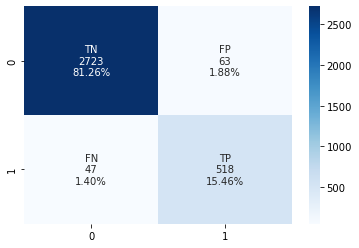

In [52]:
cf_matrix = confusion_matrix(y_test, y_pred_dt)

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.show()

This model performs really well with an precision, recall, accuracy and f1-score of 97%.
Although results are quite satisfying but if the goal is to perfectly estimate for the employee who will leave then model needs bit improvement.

In [53]:
roc_auc_score(y_test, y_pred_dt)

0.9471005469827011

## XGBoost Classifier

In [55]:
xgboost_clf = XGBClassifier()

cv_params = {'n_estimators':[50,100,150],
            'max_depth':[5,6,7],
            'learning_rate':[0.3,0.5,0.05]}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


grid_search = GridSearchCV(estimator=xgboost_clf, param_grid=cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [56]:
%%time

grid_search.fit(X_train, y_train)

CPU times: user 4min 1s, sys: 2.5 s, total: 4min 3s
Wall time: 1min 23s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.3, 0.5, 0.05],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [50, 100, 150]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [57]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}

In [58]:
grid_search.best_score_

0.9861724363310937

The model gives really good AUC score, now let's build model with best parameters.

In [59]:
xgboost_clf = XGBClassifier(learning_rate=0.05,
                            max_depth=5,
                            n_estimators=150)
xgboost_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [60]:
y_pred_xgb = xgboost_clf.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2786
           1       0.98      0.92      0.95       565

    accuracy                           0.98      3351
   macro avg       0.98      0.96      0.97      3351
weighted avg       0.98      0.98      0.98      3351



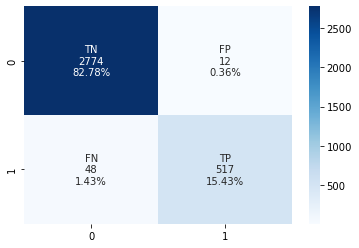

In [62]:
cf_matrix = confusion_matrix(y_test, y_pred_xgb)

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.show()

The results are quite impressive, but it is common for XGBoost models to ovrfit the data. The solution can be using ensemble emthods.

In [63]:
roc_auc_score(y_test, y_pred_xgb)

0.9553684986246022

## RANDOM FOREST CLASSIFIER

In [67]:
random_forest_clf = RandomForestClassifier()

cv_params = {'n_estimators':[50,100,150,500],
             'min_samples_leaf':[1,3,5],
             'min_samples_split':[2,3,5],
             'max_depth':[5,6,7],
             'max_samples':[0.5,0.7,1.0]
            }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


grid_search_rf = GridSearchCV(estimator=random_forest_clf, 
                              param_grid=cv_params, 
                              scoring=scoring, 
                              cv=4, 
                              refit='roc_auc')

In [68]:
%%time

grid_search_rf.fit(X_train,y_train)

/home/huda/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/huda/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/huda/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/huda/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

CPU times: user 2.75 s, sys: 4.02 ms, total: 2.75 s
Wall time: 2.75 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7], 'max_samples': [0.5],
                         'min_samples_leaf': [3], 'min_samples_split': [2],
                         'n_estimators': [150]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [69]:
grid_search_rf.best_params_

{'max_depth': 7,
 'max_samples': 0.5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [70]:
grid_search_rf.best_score_

0.9824012970094225

In [71]:
rf_clf = RandomForestClassifier(max_depth=7,
                                max_samples=0.5,
                                min_samples_leaf=3,
                                min_samples_split=2,
                                n_estimators=150)
rf_clf.fit(X_train,y_train)

/home/huda/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=7, max_samples=0.5, min_samples_leaf=3,
                       n_estimators=150)

In [72]:
y_pred_rf = rf_clf.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2786
           1       0.98      0.90      0.94       565

    accuracy                           0.98      3351
   macro avg       0.98      0.95      0.96      3351
weighted avg       0.98      0.98      0.98      3351



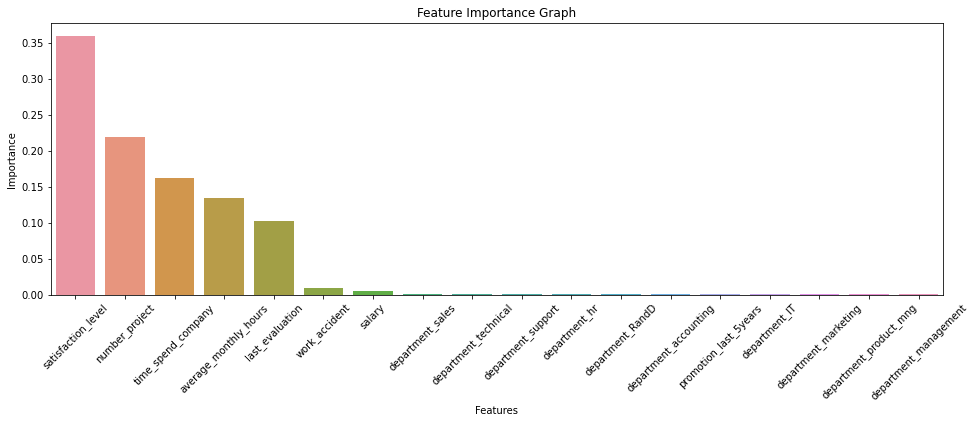

In [87]:
imp_features = rf_clf.feature_importances_
imp_feat = pd.Series(imp_features, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(16,5))
sns.barplot(x=imp_feat.index, y=imp_feat.values)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importance Graph')
plt.show()

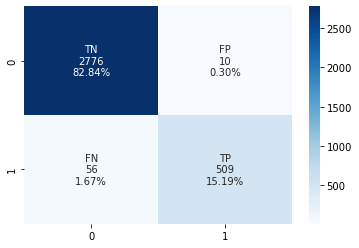

In [88]:
cf_matrix = confusion_matrix(y_test, y_pred_rf)

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
plt.show()

In [89]:
roc_auc_score(y_test, y_pred_rf)

0.9486477901517704

The results are approximately the same.

In modeling phase, we tried several models and the best validation roc score is 98.61% with roc score on test data being 95.5% using tuned XGBoost Classifier; which is pretty good and we can use it for prediction on unseen data.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



> The finalized model can predict employee rentention with 98% accuracy, giving best performance. 

> The business recommendation is to update company policies for improving management.

   >> Rewarding employees working for longer hours.
    
   >> Limiting working hours and number of projects.
    
   >> Considering long-tenured employees for promotion.
    
> The company manager should consider employee benfits and consider the issue of employees beign over-worked.

> The model might be improved by adding(related) additional variables.

> There is a concern of data leakage and availability of data used for modeling in future predictions.

## Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders

### Summary of model results

- The best model is considered to be XGBoost Classifier with accuracy, recall, precision and f1-score of 98%.
- False Negative percentage is 1.43% and False Positive percentage is 0.36%.
- Model has an AUC score of 95.5%.

The model seems to be very good at predicting and hence can be used for predictions over unseen data.

### Conclusion, Recommendations, Next Steps

Based on the analysis following are the recommendations for the stakeholders.
- Long tenured employees should be considered for promotion.
- There must be a limit on how many projects an employee can work on.
- There should be a limit of working hours.
- There must be some criteria for evaluation score based on working hours and the amount of effort an employee puts in.
- It is evident that employees are over-worked, hence steps should be taken for this.